## **Netflix Movie Catalog Explanatory Data Analysis**
#### By: Hayden Allison | 6/24/23
#### Highlights: Feature Engineering & Operating System Programming & Regression Plots
#### Report Type: Continuous Quantitative, Retrospective Observational Study Including Inferential Statistics
#### Programming Method: Python Object Oriented
#### Population: Netflix Video Catalog
#### Samples: Movies & Shows & Videos by Genre

<img src="C:\Users\tekre\Downloads\Analysis Projects\10022023_Loans_Analysis\10152023_Loan_Explanatory\gold_filigree_small.png" alt="Gold Filigree Image">

## Research Questions:
* What's the average season length? Does this change over time or by genre?
* Does runtime vary between genres or video type (movie & show)?
* How fast are videos being released, and is that yearly trend a constant increase? How many are allocated to each genre?
* For shows: is imdb score correlated to seasons or runtime?
* For movies: is imdb score correlated to runtime?
* Is imdb score correlated to genres or age certification?
## Measures Analyzed of Population
1. Minimum & Maximum: Inspected to determine why minimums/maximums of response variables are populated. Crucial for detecting variance within tables & charts.
2. Mean: Provides evidence for trends. These trends are utilized for substantiating claims derived from included datasets. Allows concise charts to be created, as it eliminates the need for every value to be plotted of a category/series.
3. Median: Middle value for center highlights.
4. Mode: Densest value for center highlights.
5. Sum: Provides evidence for response variable totals. In the absence of summing those attributes, approximations would have to be relayed instead of exact data. 
6. Distributions: Density speaks volumns about patterns within a subset of data.
7. Quartiles: Quarter 1 & Quarter 3 are encoded to be discussed for an accurate analysis of distributions.
8. Standard Deviation: To dive deeper into understanding distributions.
9. Confidence Interval: Accuracy measurement.

## Netflix Video Catalog Analysis
Analyzing Netflix's video catalog to offer recommendations into improving customer satisfaction, as well to guide production decisions for a maximized profit stream. 

<img src="C:\Users\tekre\Downloads\Analysis Projects\10022023_Loans_Analysis\10152023_Loan_Explanatory\gold_filigree_small.png" alt="Gold Filigree Image">

### Table setup for beautifully crafted charts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings

# Filter out future warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

netflix = pd.read_csv(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables\06112023_Netflix_Titles_Clean.csv")
netflix_shows = pd.read_csv(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables\06112023_Netflix_Shows_Clean.csv")
netflix_movies = pd.read_csv(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables\06112023_Netflix_Movies_Clean.csv")
genre_sample = pd.read_csv(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables\06112023_Netflix_GenreSample_Clean.csv")

# Visual settings for all charts
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'font.size': 11, 'axes.titlesize': 14,
                'axes.titlepad': 20}
sns.set(style='whitegrid', palette='rocket_r', font='sans-serif', rc=custom_params)

# Yearly mean to create a 2nd line chart type
yearly_seasons = netflix_shows[['seasons', 'release_year']].query('release_year >= 1985')

# Subtable of all netflix videos for question analysis
yearly_videos = netflix.groupby('release_year').count().reset_index()
yearly_v = yearly_videos[['release_year', 'title']].copy()
yearly_v.rename(columns={'title':'count'}, inplace=True)

## *Research Question #1*
#### *What's the average season length? Does this change over time or by genre?*

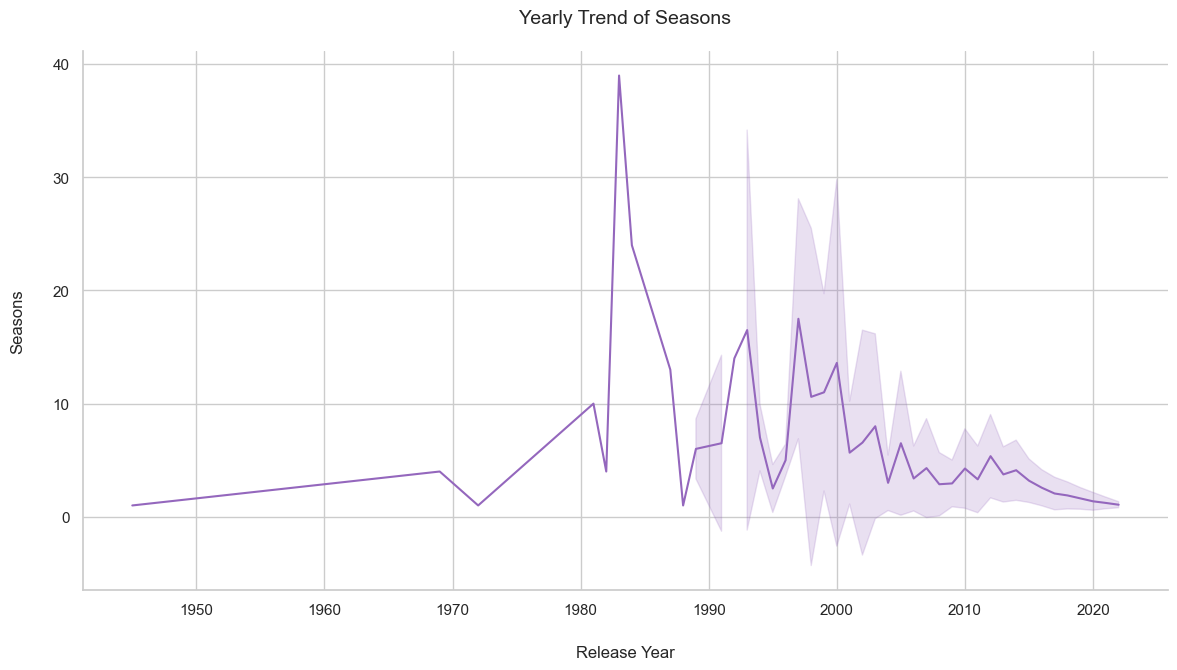

In [2]:
plt.figure(figsize=(14,7))
sns.lineplot(data=netflix_shows, x='release_year', y='seasons', ci='sd', color='tab:purple')
plt.xlabel('Release Year', labelpad=20)
plt.ylabel('Seasons', labelpad=20)
plt.title('Yearly Trend of Seasons')
plt.show()

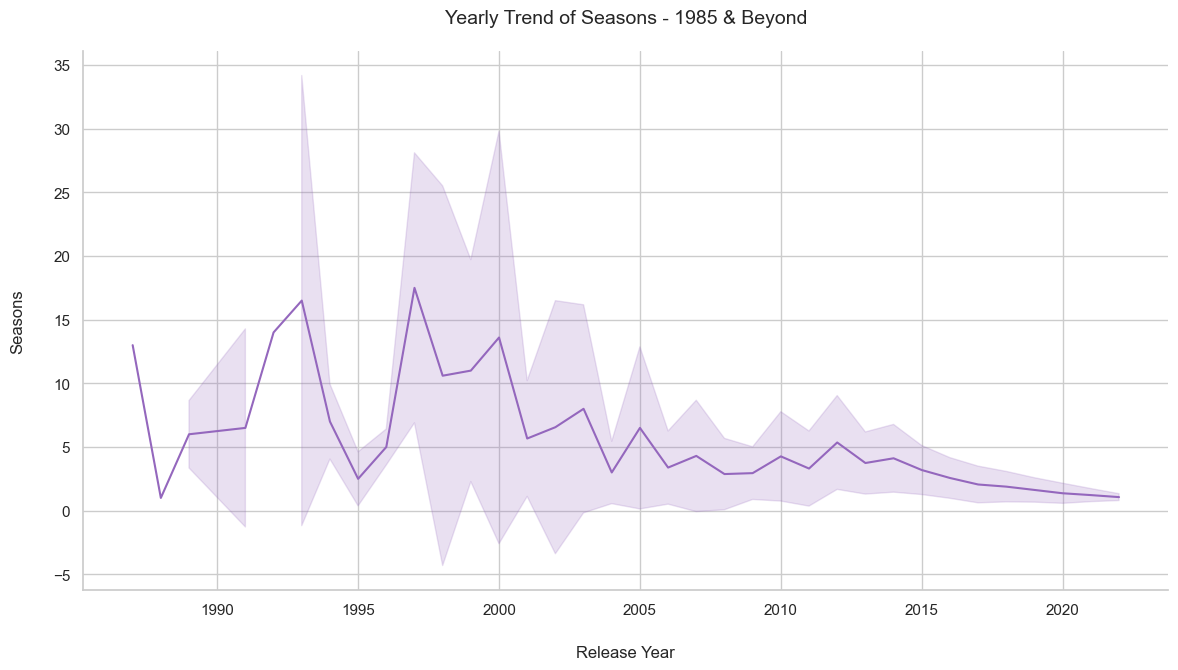

In [3]:
plt.figure(figsize=(14,7))
sns.lineplot(data=yearly_seasons, x='release_year', y='seasons', ci='sd', color='tab:purple')
plt.xlabel('Release Year', labelpad=20)
plt.ylabel('Seasons', labelpad=20)
plt.title('Yearly Trend of Seasons - 1985 & Beyond')
plt.show()

#### Yearly Trend of Seasons Analysis
Bottom chart is merely a snapshot of top chart for a depiction with improved accuracy. The max appears as 42 seasons by a year ~1985. After this peak, 2 years have the runner-up max with a value of 16 & 17 seasons which belongs to years 1993 & 1997. Purple solid line represent average per year, while shaded region around line represents corresponding standard deviation. This shaded region informs how the years 1993, 1997, and 2000 contain diverse values that’s proportional to their population. Recent years indicate less diversity in seasonal output. Year 2000 was a clear turning point where Netflix decided to focus on smaller seasonal shows. This reduction continually drops off until year 2022 where its population diversity (standard deviation shade) only includes an additional 1 or 2 values. Customers prefer new videos overextending an existing one generally. There are exceptions obviously, but this is structure of now & the future.
## *Research Question #2*
#### *Does runtime vary between genres or video type (movie & show)?*

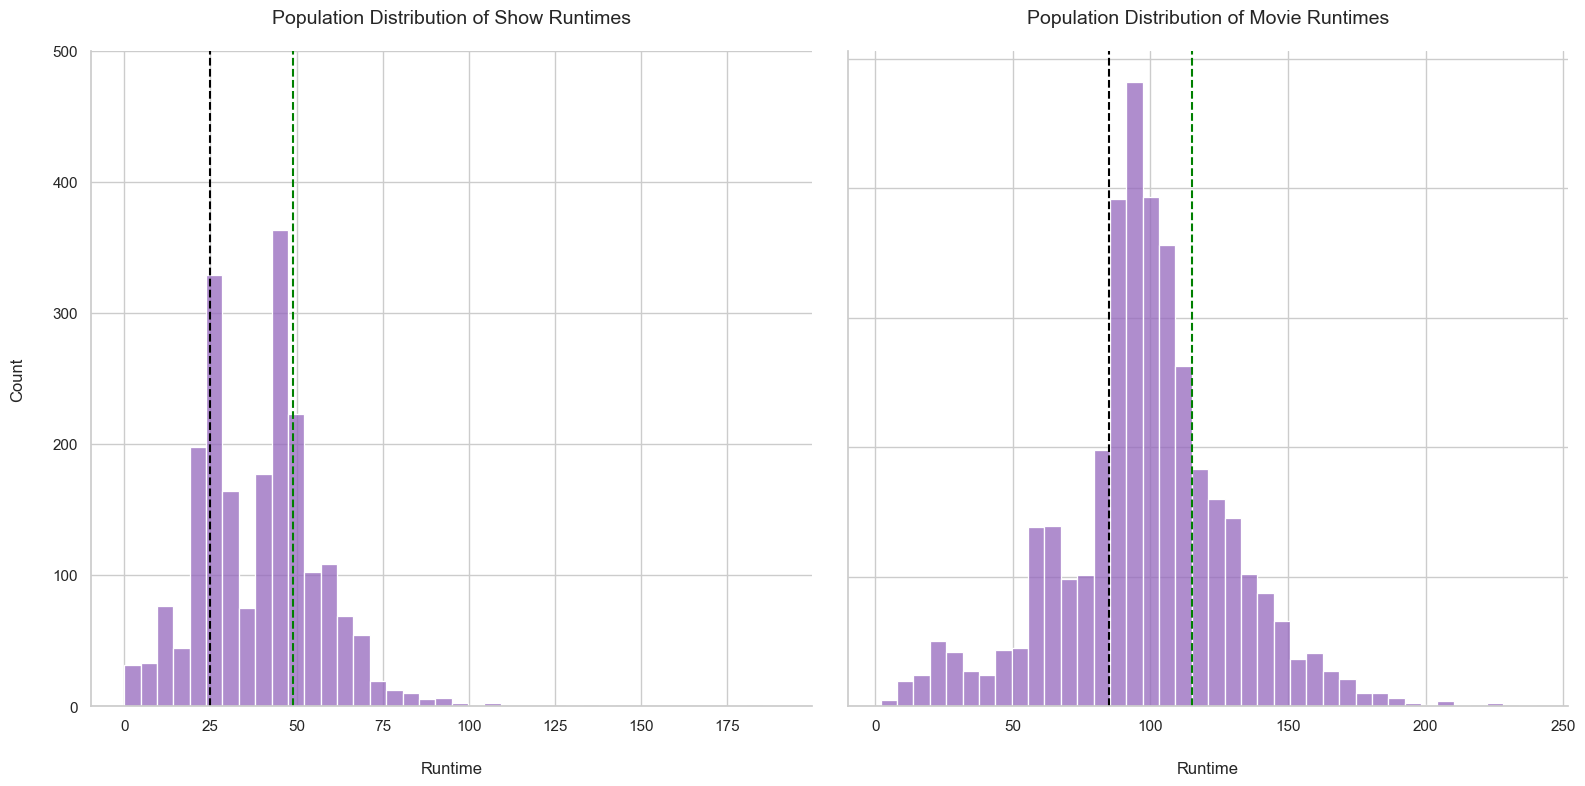

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
sns.histplot(netflix_shows.runtime, bins=40, ax=axes[0], color='tab:purple')
q1rt = np.quantile(netflix_shows.runtime, .25)
q1rtR3 = np.quantile(netflix_shows.runtime, .75)
axes[0].axvline(x=q1rtR3, label='Q3', c='g', linestyle='dashed')
axes[0].axvline(x=q1rt, label='Q1', c='black', linestyle='dashed')
axes[0].set_ylabel('Count', labelpad=20)
axes[0].set_xlabel('Runtime', labelpad=20)
axes[0].set_title('Population Distribution of Show Runtimes')
axes[0].set_yticks(range(0, 501, 100))

sns.histplot(netflix_movies.runtime, bins=40, ax=axes[1], color='tab:purple')
q1 = np.quantile(netflix_movies.runtime, .25)
q3 = np.quantile(netflix_movies.runtime, .75)
axes[1].axvline(x=q1, label='Q1', c='black', linestyle='dashed')
axes[1].axvline(x=q3, label='Q3', c='g', linestyle='dashed')
axes[1].set_ylabel('')
axes[1].set_xlabel('Runtime', labelpad=20)
axes[1].set_title('Population Distribution of Movie Runtimes')
axes[1].set(yticklabels=[])

plt.tight_layout()
plt.subplots_adjust(wspace=.05)
plt.show()

#### Population Distribution of Show & Movie Runtimes Analysis
Between the 2 charts there is a x-tick disparity. Shows cap off at 175 minutes while Movies cap off at 250 minutes. This is realistic as movies tend to have longer run times. Evidence is provided for this proposition by the quartile dotted green & black lines. 25% - 75% for shows is at 25 - 49, for movies is 85 - 115. Movies are on average 60 - 66 minutes longer. Shows is unimodial at 24 and Movies is also unimodial at 90. While movies has a single peak and single decline, shows has double. Shows similarly popular at 25 minutes runtime, which is a bit shy of the mode ~40 minutes. Netflix can adhere to production guidelines established by preexisting videos in their catalog, summarized by the charts above. Purposefully setting runtimes to generally well accepted times, the peaks of these graphs, results in customer satisfaction in a more guaranteed manner compared to the low points.

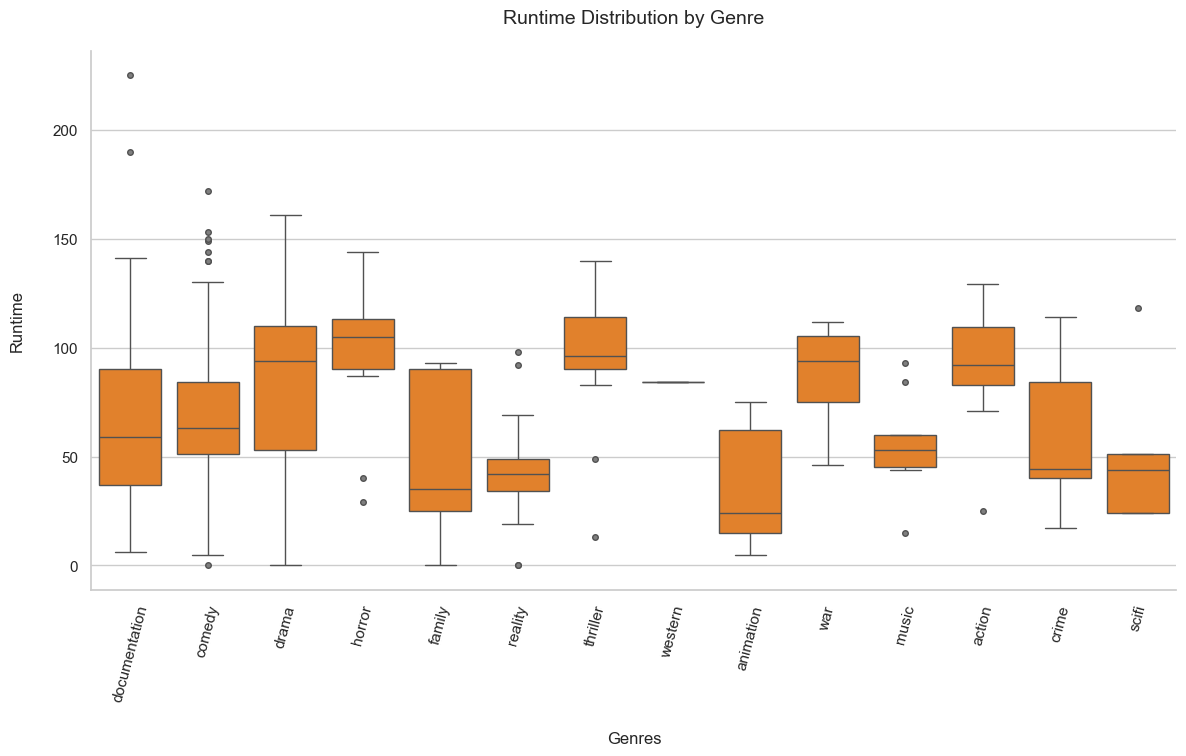

In [5]:
plt.figure(figsize=(14,7))
sns.boxplot(data=genre_sample, x='genre', y='runtime', color='tab:orange', flierprops={'markerfacecolor': 'tab:grey', 
            'markersize': 4})
plt.xticks(rotation=75)
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Genres', labelpad=20)
plt.title('Runtime Distribution by Genre')
plt.show()

#### Runtime Distribution by Genre Analysis
#### *From genre samples subtable*
Genres with diverse runtime records are documentation, comedy, drama. It's noticable due to the farther reaching box & whiskers. Contrasting these is western, scifi, and music; which stay below 100 minutes runtime. Only a couple other genres, those including reality & animation, have runtime averages as minimal and these. Standard deviation of runtime for all genres is 33.03, mean is 66.84. Outliers of chart are owned by popular genres seen in documentation, comedy, and drama. Audience tend to accept longer runtimes of these genres. Concluding from this data, is a population mainly adhering to runtimes between 50-125 minutes. Throughout every genre, it's hard to justify a video above 150 minutes; such an expenditure is a gamble considering the current status quo.
## *Research Question #3*
#### *How fast are videos being released, and is that yearly trend a constant increase? How many are allocated to each genre?*

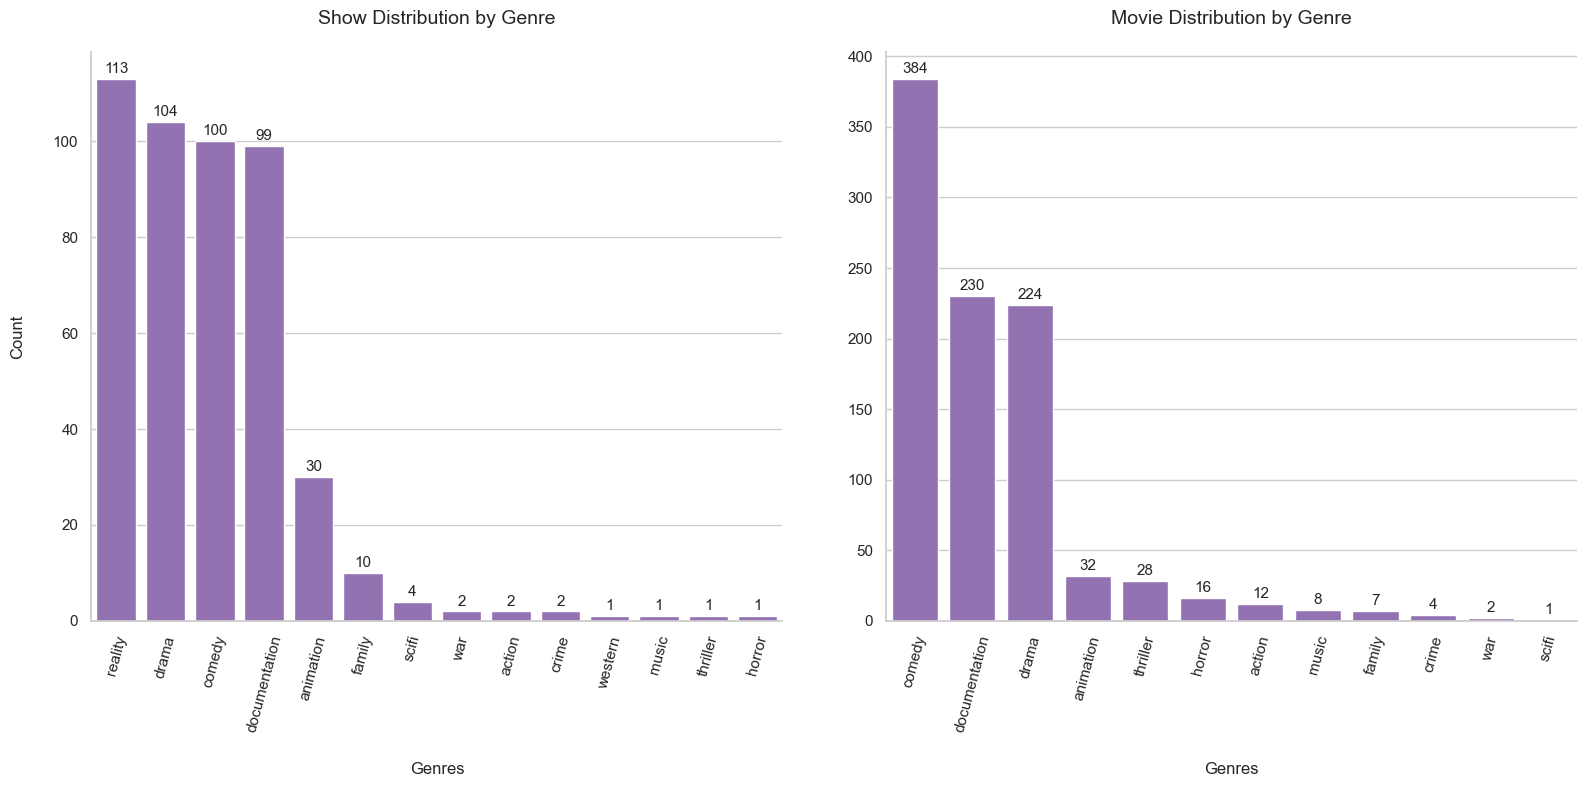

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
order_show = genre_sample.loc[genre_sample['type']=='SHOW', 'genre'].value_counts().index
order_show2 = genre_sample.loc[genre_sample['type']=='SHOW', 'genre'].value_counts()
axes[0] = sns.countplot(data=genre_sample.loc[genre_sample['type']=='SHOW'], x='genre', order=order_show,
                        color='tab:purple', ax=axes[0])
axes[0].set_ylabel('Count', labelpad=20)
axes[0].set_xlabel('Genres', labelpad=20)
axes[0].set_title('Show Distribution by Genre')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75)

# Printing values on bar
for i in range(order_show2.shape[0]):
    total = order_show2[i]
    axes[0].text(i, total+3.5, total, va='top', ha='center')

order_movie = genre_sample.loc[genre_sample['type']=='MOVIE', 'genre'].value_counts().index
order_movie2 = genre_sample.loc[genre_sample['type']=='MOVIE', 'genre'].value_counts()
axes[1] = sns.countplot(data=genre_sample.loc[genre_sample['type']=='MOVIE'], x='genre', order=order_movie,
                        color='tab:purple', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_xlabel('Genres', labelpad=20)
axes[1].set_title('Movie Distribution by Genre')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75)

# Printing values on bar
for i in range(order_movie2.shape[0]):
    total = order_movie2[i]
    axes[1].text(i, total+12, total, va='top', ha='center')

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.show()

#### Video Distribution by Genre Analysis
Shows present a slight different order to popular ranking genres. Reality and drama supersede documentation and comedy seen in movie distribution. Interestingly, reality is purely a show genre. So the fact that it beats other genres such as animation or horror is unique to this show sample. Horror, thriller, action, and music are typically in a movie format. Producers should explore movie formats for these exclusivly for maximized sales. People appreciate humor over any other video aspect. Riskier genres according to current video catalog are western, scifi, and war. This is evident from summing both chart totals, as these 3 genres are populated lowest. The combination of the above charts demonstrates the concept of safe to produce video genres and riskier to produce. However, Netflix should note that customers with a wider demographic of videos will pass by videos easier, potentially resulting in an excess of unnoticed videos. Stepping to the middle genres, videos produced will have potential to be watched proportionally more than the top-ranking genres. Marketing a new video of top-ranking genres needs to be provided so new content stands out from the old videos.

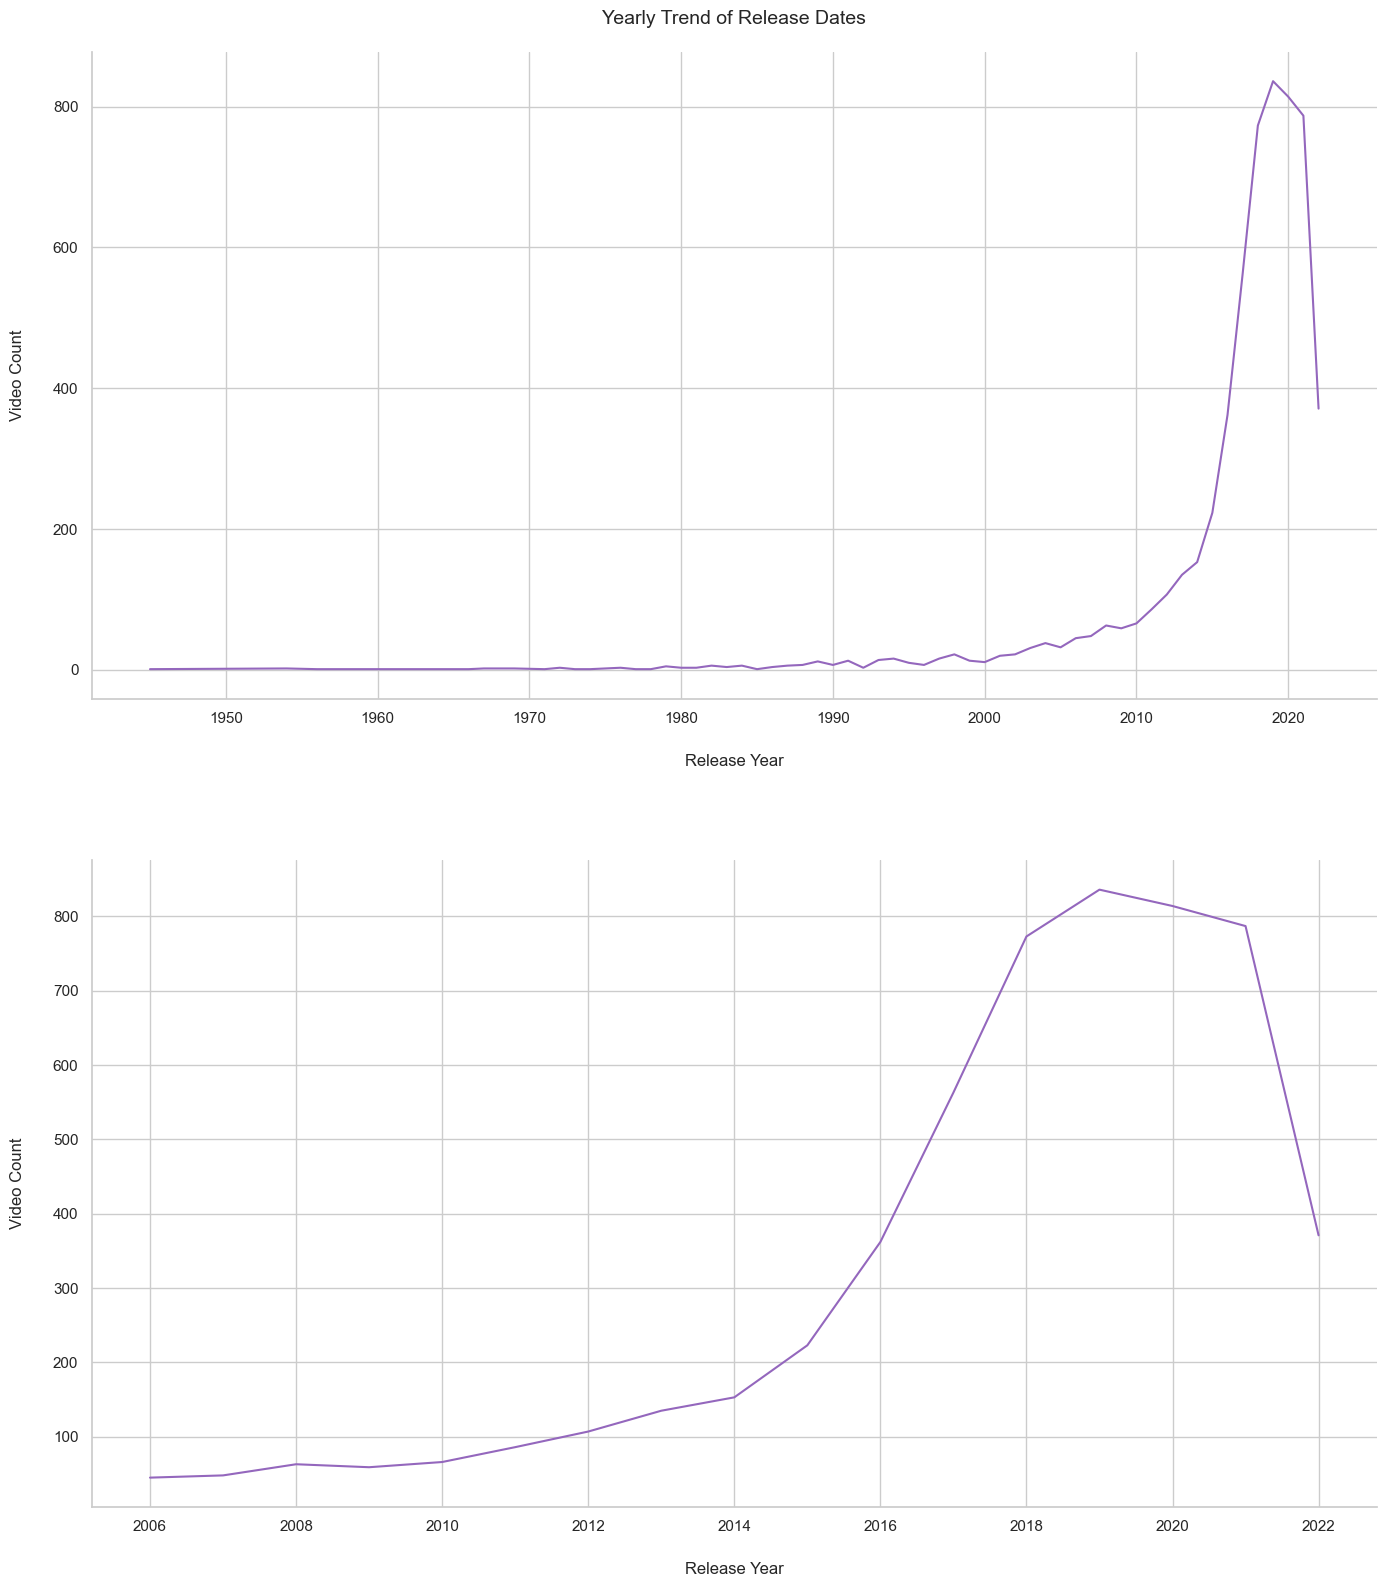

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(14,16))

# Top chart
sns.lineplot(data=yearly_v, x='release_year', y='count', color='tab:purple', ax=axes[0])
axes[0].set_xlabel('Release Year', labelpad=20)
axes[0].set_ylabel('Video Count', labelpad=20)
axes[0].set_title('Yearly Trend of Release Dates')

# Bottom chart
sns.lineplot(data=yearly_v.query('release_year > 2005'), x='release_year', y='count', color='tab:purple', ax=axes[1])
axes[1].set_xlabel('Release Year', labelpad=20)
axes[1].set_ylabel('Video Count', labelpad=20)
plt.tight_layout()
plt.subplots_adjust(hspace=.25)
plt.show()

#### Yearly Trend of Release Dates Analysis
The bottom chart is a snapshot of the rise beginning in 2005. Differences between the years before 2005 are minimal. None ever cross the 50-count threshold, with a tendency to slightly rise and then fall. Videos produced in 2005 are of interest to the public generally more than previous year films. The quantity of videos rises exponentially beginning in year 2013. Audiences respond well to these videos or Netflix would not have such a massive influx of these within its catalog. The max is a whopping 836 videos. I believe the drop of 2021 to 2022 tells a story. Netflix likely purchased rights to many films already on the market, and after these swooping purchases has limited options on the table and is turning to organically produced content. The standard deviation is 210.75 which resonates well given the exponential increase from ~50 videos to 830. Netflix should produce a significant enough number of videos that ensures the decline isn't extremely impactful to its customer base. Customers will notice a decline in content if previous release videos total 600-800 over a couple years down to 200-300. This can cause feelings of staleness and repetitiveness within its video catalog.
## *Research Question #4*
#### *For shows: is imdb score correlated to seasons or runtime?*

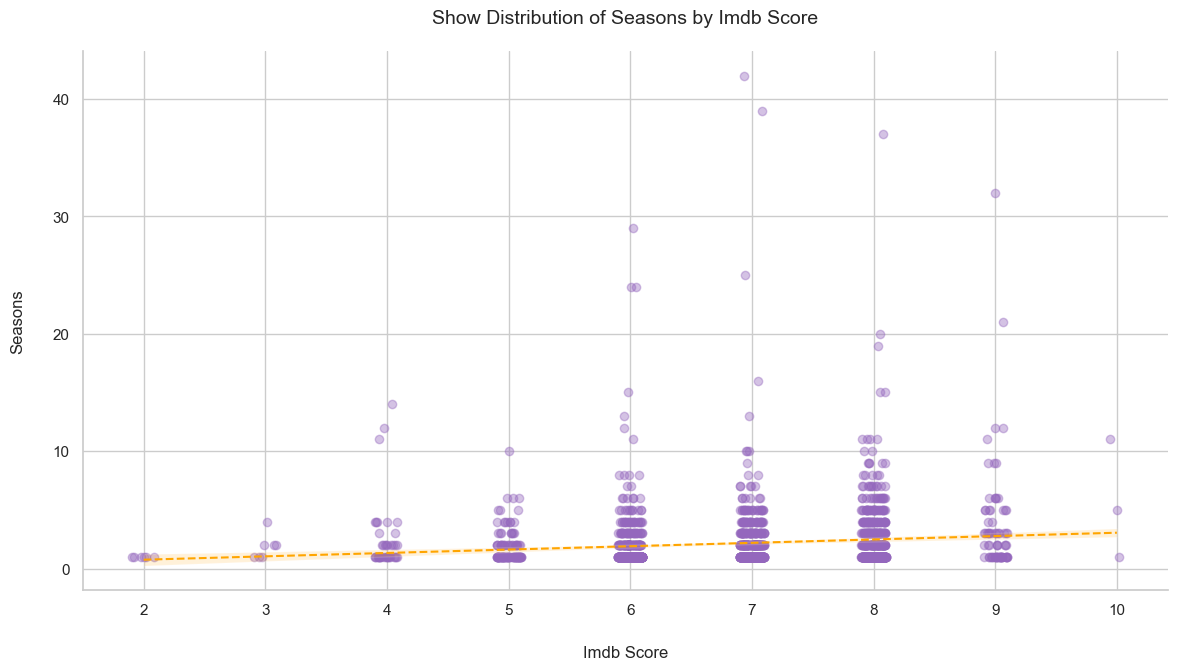

In [8]:
plt.figure(figsize=(14,7))
sns.regplot(data=netflix_shows, x='imdb_score', y='seasons', color='tab:purple', scatter_kws={'alpha':0.4},
            x_jitter=.1, line_kws={'color':'orange', 'linestyle':'dashed', 'linewidth':1.5})
plt.ylabel('Seasons', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Show Distribution of Seasons by Imdb Score')
plt.show()

#### Distribution of Seasons by Imdb Score Analysis
Outliers reach up to 40 seasons as indicated by the highest purple dots, most imdb scores contain 20 or less seasons, with 10 or less seasons becoming a noticeably denser population size. Due to the hard to achieve status of scores 2,3, and 10, these scores are not dense compared to quantities seen in other scores. Scores 4-9 all have at least one show equipped with 10 seasons. Minimum density is score 5, while maximum density is score 6 within this capacity. The dark shade of purple regions hover between 1-8 seasons for scores 4-9. Audiences have grown accommodated to this region of values for seasons provided. Netflix can use this retrospective data and apply this logic to current or even future shows. Show fatigue is a real threat to the profits/satisfaction a show provides, so acknowledging existence of this relationship will prevent show fatigue; which improves customer satisfaction regarding quality of videos/quantity of new content available. The orange dotted line represents average seasons across scores and can be used as a guideline for sticking to the average.

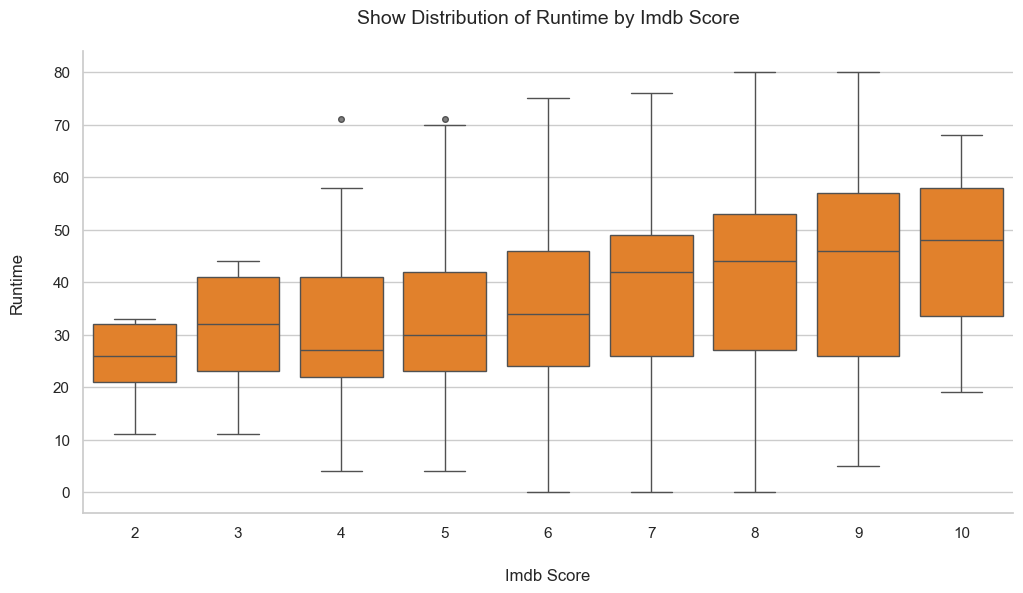

In [9]:
# Reducing outliers for boxplot
show_box2 = netflix_shows.loc[netflix_shows['runtime']<=80]

plt.figure(figsize=(12,6))
sns.boxplot(data=show_box2, x='imdb_score', y='runtime', color='tab:orange', flierprops={'markerfacecolor': 'tab:grey', 
            'markersize': 4})
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Show Distribution of Runtime by Imdb Score')
plt.show()

#### Show Distributions of Runtime by Imdb Score
Runtimes for shows stay under 100 minutes besides scare in amount outliers. Dense population is 75 & below which is the focus of this boxplot. Medians in the boxplot range from 25-45 minutes. Focusing in on common score dense populations depicted, shows range from 23 minutes - 55 minutes. For some reason there are outliers extending to 0. Potentially these are trailers that take only a minute or two as a preview mechanic available. Scores 4-9 gradually ramp up in runtime. Audiences appreciate having a likeable story that lasts for what they presumably consider a decent amount of time. The medians for scores 7, 8, 9, and 10 are close, nearly connected. A runtime formula can be applied to new shows from this population of scores to maximize customer satisfaction regarding runtime. Anything ranging from 20 - 70 minutes can captivate an audience. Deviating outside this range, or even to border the lower end of runtime seen in scores 2-5, has increased probability to result in dissatisfaction with show runtime.
## *Research Question #5*
#### *For movies: is imdb score correlated to runtime?*

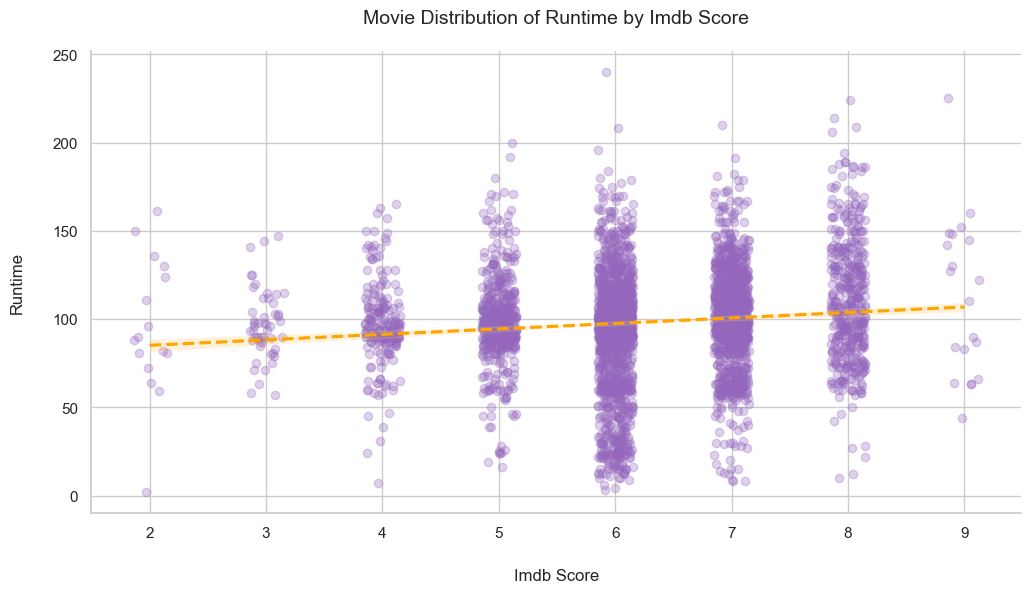

In [10]:
plt.figure(figsize=(12,6))
sns.regplot(data=netflix_movies, x='imdb_score', y='runtime', color='tab:purple', scatter_kws={'alpha':0.3},
            x_jitter=.15, line_kws={'color':'orange', 'linestyle':'dashed'})
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Movie Distribution of Runtime by Imdb Score')
plt.show()

#### Movie Distribution of Runtime by Imdb Score Analysis
Chart indicates max outlier: 240 and min outlier: 2. Movies generally have runtime below 175 minutes. The densest population region portrayed through scores is 140 - 60 minutes. Similarly to shows, scores 4, 6-8 gradually increase in runtime. 9, 3, and 2 have diverse ranges compared to other scores, validating greater flexibility in runtime to obtain these scores. The scores between these, however, have similar distribution values. The shaded purple region of bottom heatmap shows 6 & 7 scores having similar runtime. Resemblant in scores 8, 5, and 4 also but this relationship is less pronounced. 6 does contain runtime diversity max and highest/lowest outliers. Scores 2, 3, 9 are dispersed with lighter purple shade due to their low density. Movies can maximize their imdb score by staying within the darker shaded regions of the chart. Venturing outside the darker, densely populated areas should take precautions to ensure the movie is able to captivate its audience with the unorthodox runtime. The orange dotted line represents the average across scores and can be used as a guideline for runtime.
## *Research Question #6*
#### *For all videos: Is imdb score correlated to genres or age certification?*

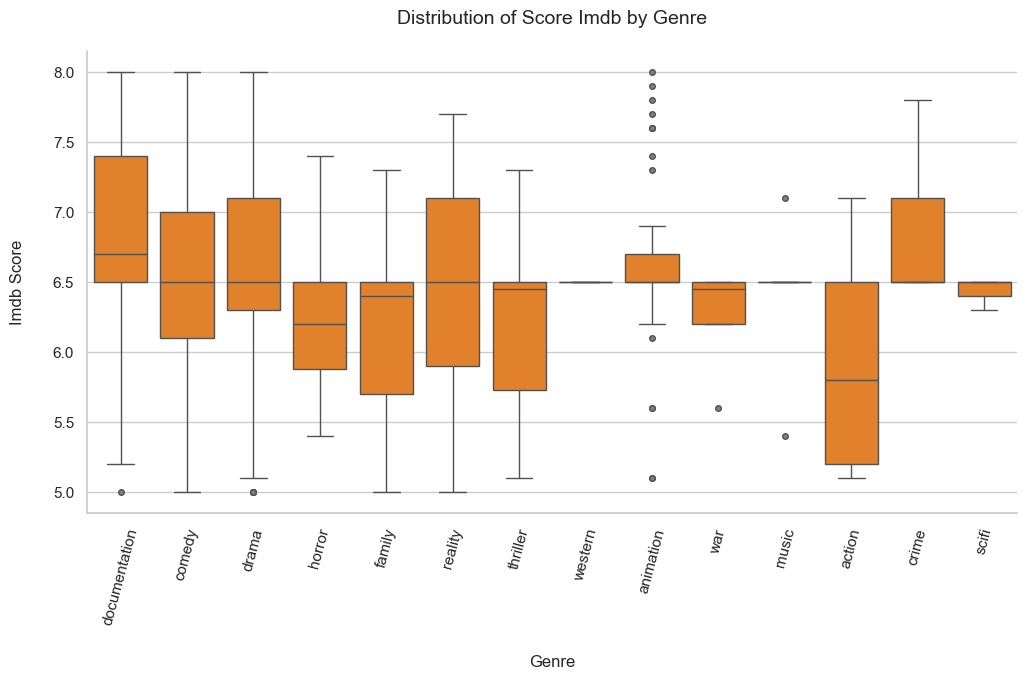

In [11]:
genre_box = genre_sample.loc[(genre_sample['imdb_score']<=8) & (genre_sample['imdb_score']>=5)]
plt.figure(figsize=(12,6))
sns.boxplot(data=genre_box, x='genre', y='imdb_score', color='tab:orange', flierprops={'markerfacecolor': 'tab:grey', 
            'markersize': 4})
plt.ylabel('Imdb Score', labelpad=20)
plt.xlabel('Genre', labelpad=20)
plt.title('Distribution of Score Imdb by Genre')
plt.xticks(rotation=75)
plt.show()

#### Distribution of Imdb Score by Genre Analysis
Inspecting the scatter plot highlights that score 9 and imdb score 5 and lower exclusively contains outliers. Dense population for imdb score population by genre is contained within scores 8-5. This box plot focuses on the dense region of values for specific distribution data. Overall, medians and boxes vary. The left half of boxes have medians around 6.5 and boxes ranges around 7.5 - 5.75. These genres are favored by audiences over others given the above average scores. Outliers across all genres range from min to max imdb score since no genre gets a free high score pass. The right half from western to scifi vary substantially more than left. Animations is outlier central, and distributions are tighter given the thinner boxes seen in western, music, and scifi genres. Could be caused by lower populations of these genres since the subtable includes 1/4th of records. Lower populated genres of this chart can be utilized more as a crossover genre and not a standalone, which is what the genre sample consists of (non-crossovers). Netflix producers undertaking videos in a lower populated standalone genre need to prepare for wider range of imdb score applied to the video. Audiences in the left half of the chart show tendency to vote 5.5-7.5 imdb score on the video; this indicates they are more reliably satisfied.

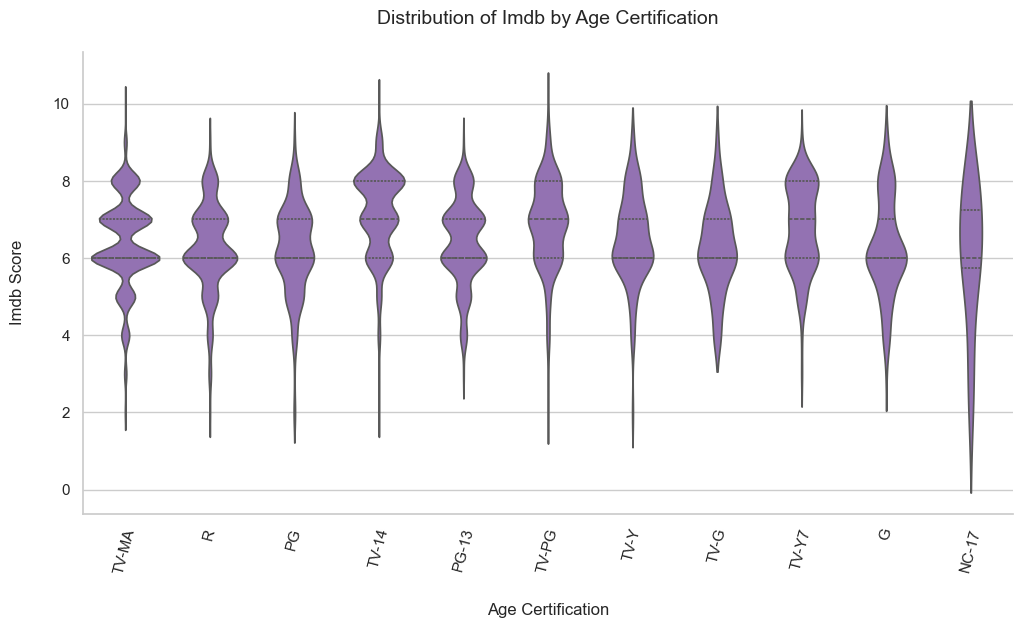

In [14]:
plt.figure(figsize=(12,6))
sns.violinplot(data=netflix, x='age_certification', y='imdb_score', color='tab:purple', inner='quartiles')
plt.ylabel('Imdb Score', labelpad=20)
plt.xlabel('Age Certification', labelpad=20)
plt.title('Distribution of Imdb by Age Certification')
plt.xticks(rotation=75)
plt.show()

#### Distribution of Imdb by Age Certification Analysis
A wide range of values consisting of outliers are shown but the violin plot whiskers. Score 8 & above then 5 & below contrive the outlier range. Dense distributions ranging from 6-8. Which tapers off gradually until 2 for most age certifications. Three age certifications fully extend from 6-8 while others are half that. Minor distributions display minor differences between categories, hence the violin plot. Left half of chart indicate repeating values in imdb score more than right half. The pointy extensions from the center substantiate this. Right half is smoother, and diverse in values with the extreme case of this seen in NC-17. It's easier for Netflix producers to land specific scores with the left half categories while right half is less forgiving/streamlined to specific scores.
## Conclusion
In this analysis, several aspects of Netflix's video catalog was explored and conclusions drawn about its producing practices. Below are recommendations for both Netflix and its customers to achieve improved profits & satisfaction.

<img src="C:\Users\tekre\Downloads\Analysis Projects\10022023_Loans_Analysis\10152023_Loan_Explanatory\gold_filigree_small.png" alt="Gold Filigree Image">

### Analysis Key Insights & Recommendations
#### Whats the average season length? Does this change over time or by genre?*
To align with customer preferences, focus on producing TV shows with shorter season lengths, as seen in the recent trend. Ensure that new content offerings are diverse and engaging, maintaining a balance between quality and quantity.
#### Does runtime vary between genres or video type (movie & show)?
Consider the established runtime guidelines in your content production. For movies, aim for runtimes around 85 to 115 minutes, while for TV shows, aim for runtimes between 25 and 49 minutes to align with audience expectations and maximize customer satisfaction.
#### How fast are videos being released, and is that yearly trend a constant increase? How many are allocated to each genre?
Explore the production of movies in popular genres and consider targeting genres with more significant audience appeal. Strive for a balance between producing well-accepted, safe-to-produce content and taking measured risks with newer genres to cater to a broader demographic of viewers.
#### For shows: is imdb score correlated to seasons or runtime?
When developing TV shows, aim for a balance between the number of seasons and runtime to maximize viewer satisfaction. Staying within the ranges indicated by the analysis can increase the likelihood of achieving higher IMDb scores.
#### For movies: is imdb score correlated to runtime?
Aim for runtimes that align with the denser, more popular ranges associated with specific IMDb scores to increase the likelihood of achieving favorable IMDb scores.
#### For all videos: Is imdb score correlated to genres or age certification?
Consider the expected IMDb score range for specific genres and age certifications when producing content. Align with the genres and age certifications that have a history of regularly receiving specific IMDb scores to enhance video ratings.